In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
import re             # regular expression library
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS

from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [94]:
pwd

'/Users/Robert/DSI/Capstone_3'

In [95]:
# Read datasets/papers.csv into papers
papers = pd.read_csv('nips-papers/papers.csv')


In [96]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [97]:
papers.tail()

,id,year,title,event_type,pdf_name,abstract,paper_text
7236,994,1994,Single Transistor Learning Synapses,NaN,994-single-transistor-learning-synapses.pdf,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...
7237,996,1994,"Bias, Variance and the Combination of Least Sq...",NaN,996-bias-variance-and-the-combination-of-least...,Abstract Missing,"Bias, Variance and the Combination of\nLeast S..."
7238,997,1994,A Real Time Clustering CMOS Neural Engine,NaN,997-a-real-time-clustering-cmos-neural-engine.pdf,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....
7239,998,1994,Learning direction in global motion: two class...,NaN,998-learning-direction-in-global-motion-two-cl...,Abstract Missing,Learning direction in global motion: two\nclas...
7240,999,1994,Correlation and Interpolation Networks for Rea...,NaN,999-correlation-and-interpolation-networks-for...,Abstract Missing,Correlation and Interpolation Networks for\nRe...


In [98]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
id            7241 non-null int64
year          7241 non-null int64
title         7241 non-null object
event_type    2422 non-null object
pdf_name      7241 non-null object
abstract      7241 non-null object
paper_text    7241 non-null object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


In [99]:
drop_cols = ['id', 'event_type', 'pdf_name']
papers.drop(columns=drop_cols, axis=1, inplace=True)


In [100]:
# Group the papers by year
groups = papers.groupby(['year'])

# Determine the size of each group
counts = groups.size()

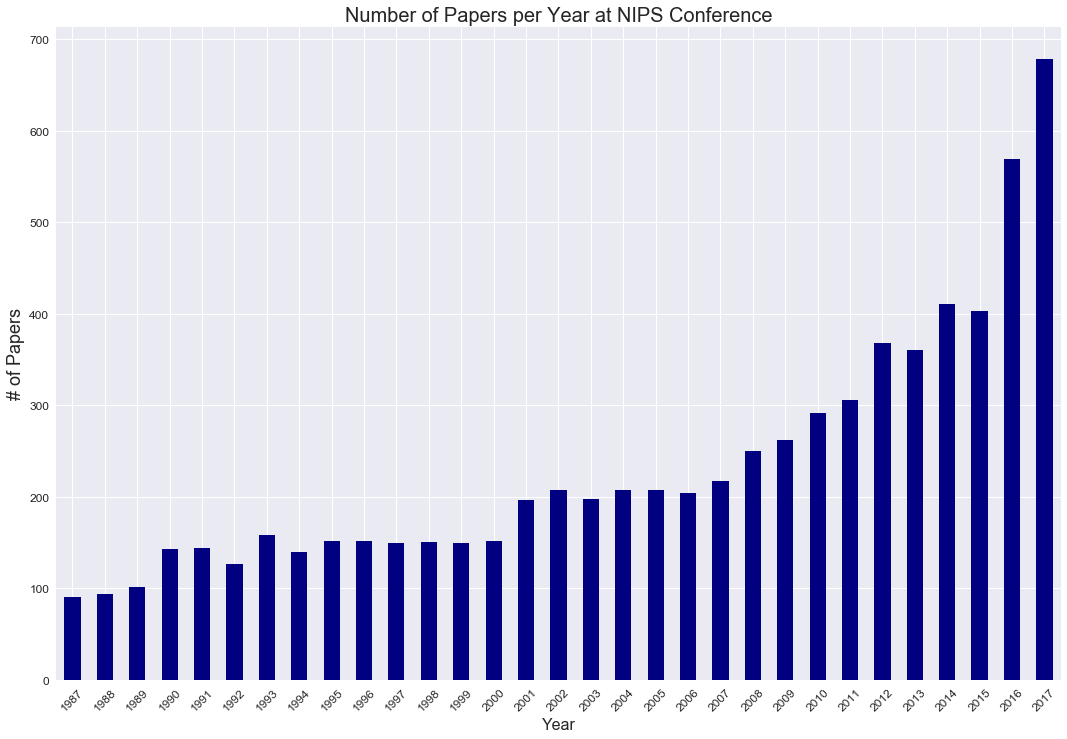

In [101]:
# Group the papers by year
groups = papers.groupby(['year'])

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
ax = counts.plot(kind='bar', figsize=(18,12), rot=45, fontsize=12, colormap='jet')

ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("# of Papers",fontsize=18)
ax.set_title("Number of Papers per Year at NIPS Conference", fontsize=20)
plt.savefig('images/papers_year_bar')

# savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)

# Build a wordcloud of the titles

In [102]:
# Preprocess text
# Print the titles of the first rows 
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
papers['title_processed'][0:10]

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
5    using a neural net to instantiate a deformable...
6             plasticity-mediated competitive learning
7    iceg morphology classification using an analog...
8    real-time control of a tokamak plasma using ne...
9    pulsestream synapses with non-volatile analogu...
Name: title_processed, dtype: object

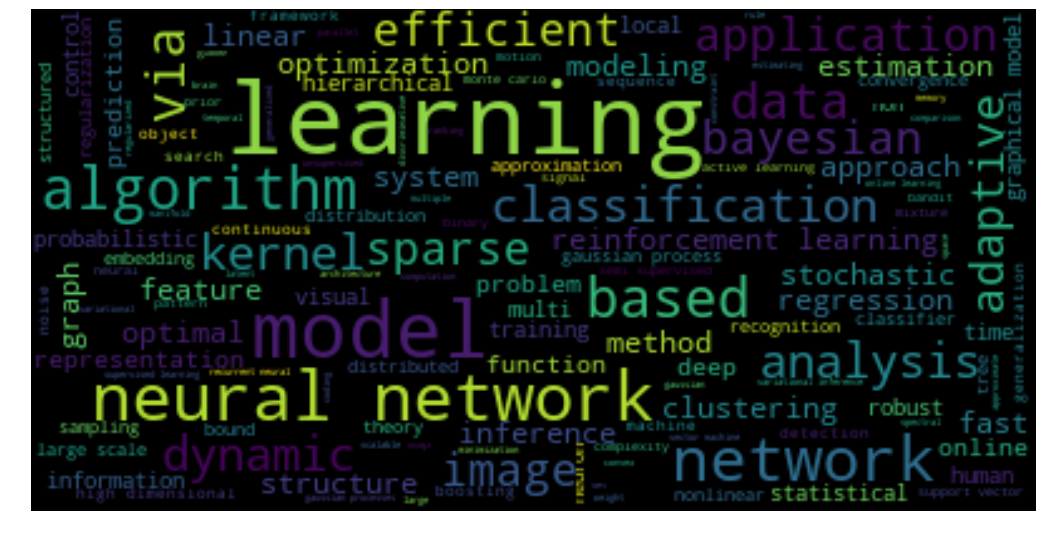

In [103]:
# For wordcloud
# Join the different processed titles together.
long_string = ' '.join(papers.title_processed)

# Create a WordCloud object
wordcloud = WordCloud()

# # Generate a word cloud
#wordcloud.generate(long_string)

# # Visualize the word cloud
# wordcloud.to_image()

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(long_string)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('images/word_cloud_titles')
#wordcloud.to_file("images/word_cloud_titles")
plt.show()

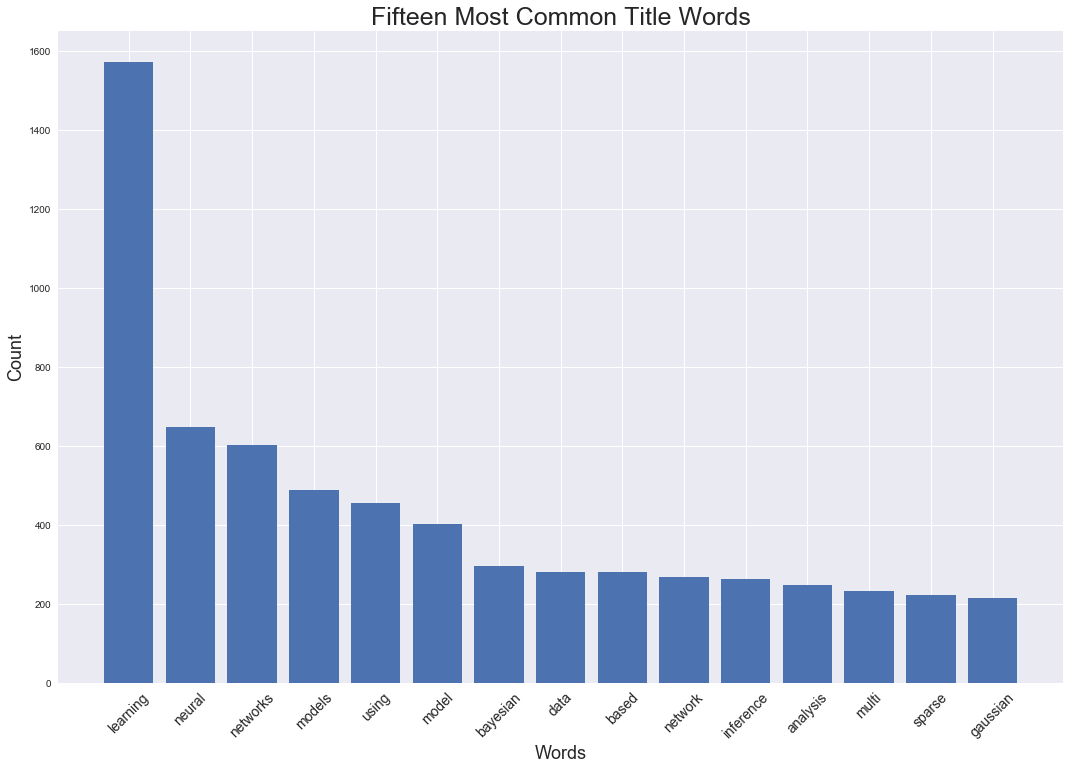

In [104]:
#Still working with Titles
# function to print 10 most common words
#plt.style.use('ggplot')
plt.style.use('seaborn')
def plot_15_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(figsize=(18,12))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=45, fontsize=14) 
    plt.xlabel('Words',fontsize=18)
    plt.ylabel('Count',fontsize=18)
    plt.title('Fifteen Most Common Title Words', fontsize=25)
#    fig.set_size_inches(18.5, 10.5)
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers.title_processed)

# Visualise the 10 most common words
plot_15_most_common_words(count_data, count_vectorizer)

# Build a wordcloud of the text

In [105]:
#Function to build long string of paper text plus abstract, if present
def realdata(papertexts):
    s = ""
    for i in range(len(papertexts)):
        w_list = papertexts[i].split()
        indexvalue= w_list.index("abstract")+1 if "abstract" in w_list else 0
        s = s+ " ".join( w_list[indexvalue: ] )
    return s

In [106]:
papertext = papers['paper_text'].str.lower()
completestring = realdata(papertext)

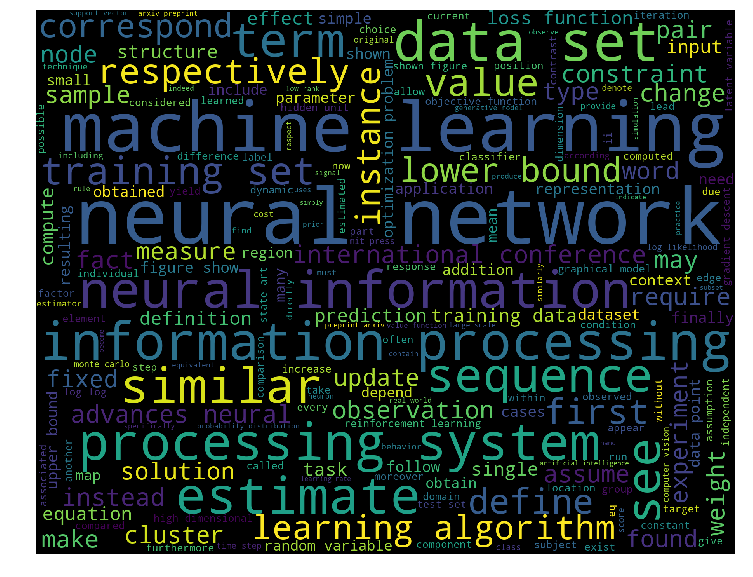

In [107]:
#Iteritively added stopwords to exclude the "uninteresting"
stopwords = STOPWORDS
stopwords.update(["this","that","thus","from","does","example","however","since","given",
                  "et","al", "hence", "therefore", "use", "used", "note", "corresponding", 
                  "setting", "well", "one", "form", "using", "second", "even", "known", "either",
                 "consider", "particular", "general", "represent", "case", "output", "defined",
                 "rather", "though", "although"])
wordcloud = WordCloud(
                      stopwords=stopwords,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(completestring)
plt.figure( figsize =(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('images/word_cloud_titles')

In [108]:
len(completestring)

201874025

In [109]:
papers.columns

Index(['year', 'title', 'abstract', 'paper_text', 'title_processed'], dtype='object')

# Preprocess text

In [110]:
# # Use stopwords from "nltk.corpus"
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english')) # sets are efficient
# stop_words.update(["this", "that", "thus", "from", "does", "example", "however", "since", "given", 
#                     "et", "al", "hence", "therefore", "use", "used", "note", "corresponding", 
#                     "setting", "well", "one", "form", "using", "second", "even", "known", "either",
#                     "consider", "particular", "general", "represent", "case", "output", "defined",
#                     "rather", "though", "although", "set", "problem", "function", "figure", "given",
#                     "results", "number", "time", "data", "results", "given", "information", "different",
#                     "models", "method", "n", "j", "r", "l", "mj", "a", "cj", "zero", "iv", "is", "elsewhere",
#                     "large", "may", "finally", "c", "describing", "l", "cells", "single", "field",
#                     "approximation", "activity", "mean", "input"])


In [111]:
start_time = timeit.default_timer()
# This function removes process the stopwords. Takes 3-4mins
def rem_stopwords(txt):
    words = txt.split()
    ret_word = words.copy()
    for w in words: 
        if w.lower() in stop_words:
            ret_word.remove(w)
    return (" ".join(ret_word))
papers['text_processed'] = papers['paper_text'].map(rem_stopwords)
elapsed = timeit.default_timer() - start_time
print(elapsed)

201.33341390199985


In [112]:
start_time = timeit.default_timer()
# This cell takes a long time, longer than 3 mins(seems slower)
#Print the text of the first 3 rows 
print(papers['paper_text'].head(3))

# Remove punctuation
papers['text_processed'] = papers['text_processed'].map(lambda text: [w for w in word_tokenize(text.lower()) 
                  if w.isalpha()])

# # Print the processed titles of the first rows 
papers['text_processed'][0:3]
elapsed = timeit.default_timer() - start_time
print(elapsed)

0    767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1    683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2    394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
Name: paper_text, dtype: object
220.2782727019994


In [113]:
#Runs fast, less than 2 secs.
# start_time = timeit.default_timer()
papers['text_string'] = [" ".join(map(str, l)) for l in papers['text_processed']]
elapsed = timeit.default_timer() - start_time
# print(elapsed)
# papers.head(2)

In [114]:
print(papers.info())
papers.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
year               7241 non-null int64
title              7241 non-null object
abstract           7241 non-null object
paper_text         7241 non-null object
title_processed    7241 non-null object
text_processed     7241 non-null object
text_string        7241 non-null object
dtypes: int64(1), object(6)
memory usage: 396.1+ KB
None


,year,title,abstract,paper_text,title_processed,text_processed,text_string
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,self-organization of associative database and ...,"[associative, database, applications, hisashi,...",associative database applications hisashi suzu...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,a mean field theory of layer iv of visual cort...,"[theory, layer, visual, cortex, application, a...",theory layer visual cortex application artific...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,storing covariance by the associative long-ter...,"[storing, covariance, associative, long, term,...",storing covariance associative long term poten...


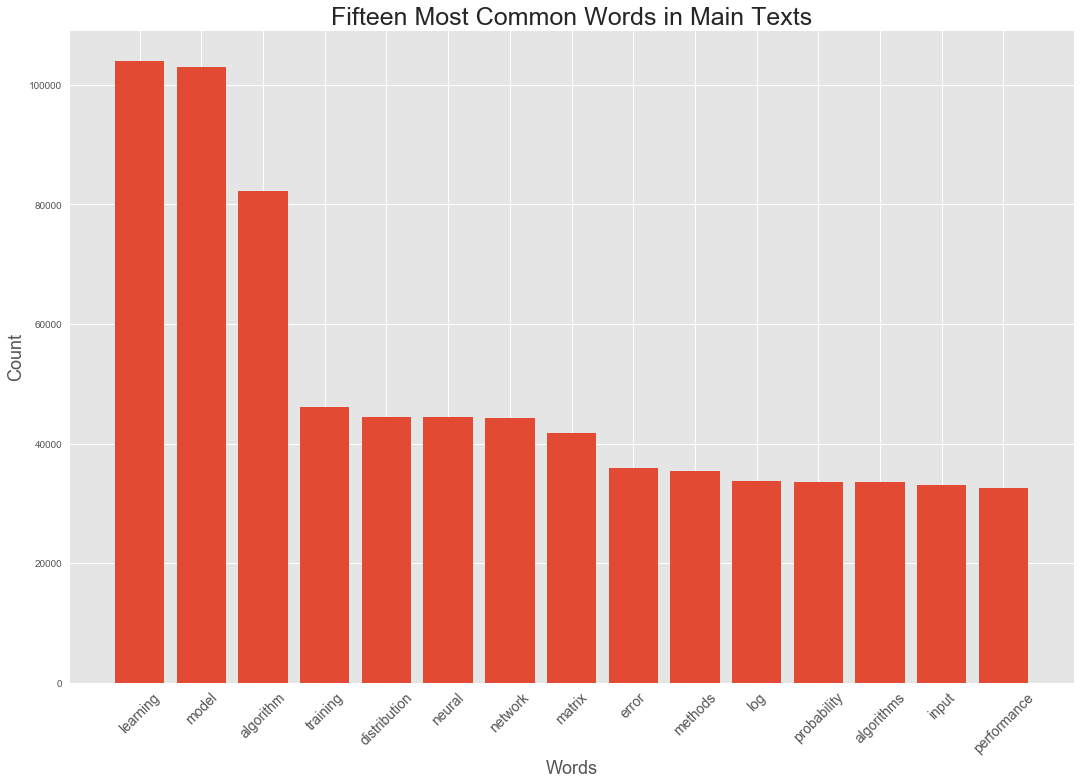

334.66421555500074


In [115]:
# Working with Main Texts
# function to print 15 most common words
plt.style.use('ggplot')
#plt.style.use('seaborn')
def plot_15_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(figsize=(18,12))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=45, fontsize=14) 
    plt.xlabel('Words',fontsize=18)
    plt.ylabel('Count',fontsize=18)
    plt.title('Fifteen Most Common Words in Main Texts', fontsize=25)
    plt.savefig('images/Most_Com_W_in_Text')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer_2 = CountVectorizer(stop_words='english')

# Fit and transform the processed texts
count_data_2 = count_vectorizer_2.fit_transform(papers.text_string)

# Visualise the 10 most common words
plot_15_most_common_words(count_data_2, count_vectorizer_2)
elapsed = timeit.default_timer() - start_time
print(elapsed)

In [116]:
#from nltk.tokenize import word_tokenize
from collections import Counter
counter = Counter(word_tokenize(papers.text_string[1]))
# Out[3]:
# Counter({'.': 3,
# 'The': 3,
# 'box': 3,
# 'cat': 3,
# 'in': 1,
# ...
# 'the': 3})
counter.most_common(15)

[('network', 38),
 ('cell', 29),
 ('synapses', 27),
 ('cortical', 20),
 ('eye', 14),
 ('layer', 12),
 ('visual', 9),
 ('cortex', 9),
 ('theory', 8),
 ('pattern', 8),
 ('average', 8),
 ('synaptic', 8),
 ('inhibitory', 8),
 ('state', 7),
 ('a', 7)]

In [118]:
# Import WordNetLemmatizer
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords

# Retain alphabetic words: alpha_only
alpha_only = [t for t in papers.text_processed[1] if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
# lemmatized = wordnet_lemmatizer.lemmatize(papers.text_processed[1])

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))


[('network', 42), ('cell', 35), ('synapsis', 27), ('cortical', 20), ('eye', 14), ('layer', 12), ('state', 11), ('memory', 11), ('visual', 9), ('cortex', 9)]


In [124]:
print(papers.info())
papers.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
year               7241 non-null int64
title              7241 non-null object
abstract           7241 non-null object
paper_text         7241 non-null object
title_processed    7241 non-null object
text_processed     7241 non-null object
text_string        7241 non-null object
dtypes: int64(1), object(6)
memory usage: 396.1+ KB
None


,year,title,abstract,paper_text,title_processed,text_processed,text_string
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,self-organization of associative database and ...,"[associative, database, applications, hisashi,...",associative database applications hisashi suzu...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,a mean field theory of layer iv of visual cort...,"[theory, layer, visual, cortex, application, a...",theory layer visual cortex application artific...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,storing covariance by the associative long-ter...,"[storing, covariance, associative, long, term,...",storing covariance associative long term poten...


In [275]:
#print(list(papers.text_processed[0]))
type(papers.text_processed)

pandas.core.series.Series

In [133]:
# def tokenize(text):
#     return [token for token in text if token not in STOPWORDS]
# speeches = papers.text_string
# documents = speeches.tolist()
# texts = [tokenize(document) for document in documents]

In [201]:
# # Use stopwords from "nltk.corpus"
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english')) # sets are efficient
STOPWORDS.update(["this", "that", "thus", "from", "does", "example", "however", "since", "given", 
                    "et", "al", "hence", "therefore", "use", "used", "note", "corresponding", 
                    "setting", "well", "one", "form", "using", "second", "even", "known", "either",
                    "consider", "particular", "general", "represent", "case", "output", "defined",
                    "rather", "though", "although", "set", "problem", "function", "figure", "given",
                    "results", "number", "time", "data", "results", "given", "information", "different",
                    "models", "method", "n", "j", "r", "l", "mj", "a", "cj", "zero", "iv", "is", "elsewhere",
                    "large", "may", "finally", "c", "describing", "l", "cells", "single", "field",
                    "approximation", "activity", "mean", "input", "x", "f", "here", "y", "means", "make", "say",
                    "that", "then", "good", "clarify", "b", "t", "layers", "s", "e", "units", "input", "h", 
                    "z", "p", "xt", "items", "player", "two", "item", "let", "d", "w", "ti", "m", "g", "local",
                    "q", "actions", "users", "system", "regret", "user", "xi", "rule",
                    "eq", "kl", "em", "v", "u", "first", "entries", "optimal", "error", "o", "result",
                    "see", "section", "update", "theorem", "variables", "rl", "st", "size", "based", "fig", "source",
                    "sources", "step", "o", "xi", "vi", "approach", "yt", ])


In [322]:
print(len(STOPWORDS))
#STOPWORDS.remove("learning")
STOPWORDS

315


{'a',
 'about',
 'above',
 'actions',
 'activity',
 'after',
 'again',
 'against',
 'al',
 'all',
 'also',
 'although',
 'am',
 'an',
 'and',
 'any',
 'approach',
 'approximation',
 'are',
 "aren't",
 'as',
 'at',
 'b',
 'based',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'c',
 'can',
 "can't",
 'cannot',
 'case',
 'cells',
 'cj',
 'clarify',
 'com',
 'consider',
 'corresponding',
 'could',
 "couldn't",
 'd',
 'data',
 'defined',
 'describing',
 'did',
 "didn't",
 'different',
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'e',
 'each',
 'either',
 'else',
 'elsewhere',
 'em',
 'entries',
 'eq',
 'error',
 'et',
 'even',
 'ever',
 'example',
 'f',
 'few',
 'field',
 'fig',
 'figure',
 'finally',
 'first',
 'for',
 'form',
 'from',
 'function',
 'further',
 'g',
 'general',
 'get',
 'given',
 'good',
 'h',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'h

In [255]:
def tokenize(text):
    return [token for token in text if token not in STOPWORDS]
speeches = papers.text_processed
documents = speeches.tolist()
texts = [tokenize(document) for document in documents]


# bigram = Phraser(phrases)
# >>> sent = [u'the', u'mayor', u'of', u'new', u'york', u'was', u'there']
# >>> print(bigram[sent])

In [300]:
## -----------------------------------------------------------------------------------
import re
from gensim.models.phrases import Phrases, Phraser
#from gensim.corpora.dictionary import Dictionary
from gensim.models import TfidfModel


def tokenize(text):
    return [token for token in text if token not in STOPWORDS]
speeches = papers.text_processed
documents = speeches.tolist()
texts = [tokenize(document) for document in documents]

In [303]:
print(type(texts))
len(texts)

<class 'list'>


7241

In [304]:
trg_sent = [['machine','learning','neural','network','dummy','neural','networks'], 
            ['neural','networks', 'dummy','neural','network','machine','learning']]
phrases = Phrases(trg_sent, min_count=1, threshold=1)
bigram = Phraser(phrases)
test_sent = ['machine','learning','neural','network','neural','networks']
print(bigram[test_sent])

corpus = [bigram[paper] for paper in texts]

['machine_learning', 'neural_network', 'neural_networks']


In [305]:
print(type(corpus))
len(corpus)

<class 'list'>


7241

In [324]:
print(texts[5])
corpus[11]

['sing', 'neural', 'net', 'instantiate', 'deformable', 'model', 'christopher', 'williams', 'michael', 'revowand', 'geoffrey', 'hinton', 'department', 'computer', 'science', 'university', 'toronto', 'toronto', 'ontario', 'canada', 'abstract', 'deformable', 'attractive', 'recognizing', 'nonrigid', 'objects', 'considerable', 'within', 'class', 'variability', 'severe', 'search', 'problems', 'associated', 'fitting', 'show', 'neural', 'networks', 'provide', 'better', 'starting', 'points', 'search', 'significantly', 'reduced', 'demonstrated', 'character', 'recognition', 'task', 'previous', 'work', 'developed', 'handwritten', 'character', 'recognition', 'deformable', 'hinton', 'williams', 'revow', 'revow', 'williams', 'hinton', 'obtained', 'performance', 'major', 'search', 'procedure', 'fitting', 'model', 'image', 'computationally', 'intensive', 'efficient', 'algorithm', 'dynamic', 'programming', 'task', 'paper', 'demonstrate', 'possible', 'compile', 'knowledge', 'gained', 'fitting', 'obtain',

['multidimensional',
 'scaling',
 'clustering',
 'thomas',
 'hofmann',
 'joachim',
 'buhmann',
 'rheinische',
 'niversitat',
 'institut',
 'fur',
 'informatik',
 'ill',
 'bonn',
 'germany',
 'email',
 'abstract',
 'visualizing',
 'structuring',
 'pairwise',
 'dissimilarity',
 'difficult',
 'combinatorial',
 'optimization',
 'problems',
 'multidimensional',
 'scaling',
 'pairwise',
 'clustering',
 'algorithms',
 'embedding',
 'dissimilarity',
 'euclidian',
 'space',
 'clustering',
 'actively',
 'selecting',
 'support',
 'clustering',
 'process',
 'discussed',
 'maximum',
 'entropy',
 'framework',
 'active',
 'selection',
 'provides',
 'strategy',
 'discover',
 'structure',
 'efficiently',
 'partially',
 'unknown',
 'introduction',
 'grouping',
 'experimental',
 'compact',
 'clusters',
 'arises',
 'analysis',
 'psychology',
 'linguistics',
 'genetics',
 'experimental',
 'sciences',
 'supposed',
 'clustered',
 'explicit',
 'coordinate',
 'representation',
 'central',
 'clustering',
 'char

In [ ]:
corpus[2]

In [284]:
len(corpus)

7241

In [256]:
#corpus = [bigrams[doc] for doc in texts]



# dictionary = Dictionary(corpus)
# # and here is your tfidf model:
# # tfidf = TfidfModel(dictionary=dictionary, normalize=True)


# docs = [tokenize(doc) for doc in docs]
# phrases = Phrases(docs)
# bigrams = Phraser(phrases)
# corpus = [[stemmer.stem(w) for w in bigrams[doc]] for doc in docs]

In [308]:
from collections import defaultdict
frequency = defaultdict(int)
for text in corpus:
    for token in text:
        frequency[token] += 1

texts_2 = [[token for token in text if frequency[token] > 10] for text in corpus]

In [319]:
texts_2[7]

['iceg',
 'morphology',
 'classification',
 'analogue',
 'vlsi',
 'neural_network',
 'richard',
 'coggins',
 'marwan',
 'jabri',
 'barry',
 'flower',
 'stephen',
 'pickard',
 'systems',
 'engineering',
 'design',
 'automation',
 'laboratory',
 'department',
 'electrical',
 'engineering',
 'university',
 'sydney',
 'australia',
 'email',
 'abstract',
 'analogue',
 'vlsi',
 'neural_network',
 'designed',
 'tested',
 'perform',
 'cardiac',
 'morphology',
 'classification',
 'tasks',
 'analogue',
 'techniques',
 'chosen',
 'meet',
 'strict',
 'power',
 'area',
 'requirements',
 'implantable',
 'icd',
 'robustness',
 'neural_network',
 'architecture',
 'reduces',
 'impact',
 'noise',
 'drift',
 'offsets',
 'inherent',
 'analogue',
 'approaches',
 'network',
 'percept',
 'ron',
 'chip',
 'digital',
 'weight',
 'storage',
 'bucket',
 'brigade',
 'feed',
 'iceg',
 'network',
 'winner',
 'take',
 'circuit',
 'network',
 'trained',
 'loop',
 'included',
 'commercial',
 'icd',
 'signal',
 'proces

In [309]:
from gensim import corpora
dictionary = corpora.Dictionary(texts_2)
corpus_test = [dictionary.doc2bow(text) for text in texts_2]

In [310]:
len(corpus_test)

7241

In [289]:
len(dictionary)

33596

In [311]:
from gensim.models.ldamodel import LdaModel
# fit gensim's LDA model
# the number of topics should be optimized iteratively
papers_topics = LdaModel(corpus=corpus_test,
                           id2word=dictionary,
                           num_topics=20,
                           passes=10)

In [312]:
from pprint import pprint
# print out first 20 topics
for i, topic in enumerate(papers_topics.print_topics(20)):
    pprint("{} --- {}".format(i, topic))
    print()


('0 --- (0, \'0.024*"model" + 0.011*"task" + 0.010*"learning" + 0.010*"human" '
 '+ 0.005*"target" + 0.005*"control" + 0.005*"memory" + 0.005*"tasks" + '
 '0.005*"feedback" + 0.004*"attention"\')')

('1 --- (1, \'0.034*"network" + 0.015*"networks" + 0.012*"training" + '
 '0.009*"hidden" + 0.007*"layer" + 0.007*"neural_network" + 0.007*"unit" + '
 '0.007*"neural_networks" + 0.006*"weights" + 0.006*"performance"\')')

('2 --- (2, \'0.022*"kernel" + 0.020*"matrix" + 0.010*"space" + 0.007*"points" '
 '+ 0.007*"kernels" + 0.006*"linear" + 0.006*"distance" + 0.006*"learning" + '
 '0.006*"tensor" + 0.005*"matrices"\')')

('3 --- (3, \'0.027*"policy" + 0.018*"learning" + 0.017*"state" + '
 '0.016*"reward" + 0.013*"action" + 0.011*"value" + 0.010*"reinforcement" + '
 '0.009*"algorithm" + 0.008*"agent" + 0.008*"control"\')')

('4 --- (4, \'0.021*"model" + 0.017*"prediction" + 0.014*"regression" + '
 '0.007*"matrix" + 0.007*"missing" + 0.007*"training" + 0.006*"tasks" + '
 '0.006*"task" + 0.006*"

In [313]:
import timeit
start_time = timeit.default_timer()

import pyLDAvis.gensim as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(papers_topics, corpus_test, dictionary)
pyLDAvis.display(vis_data)

elapsed = timeit.default_timer() - start_time
print(elapsed)

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [314]:
# from gensim.models.tfidfmodel import TfidfModel

# # Create a new TfidfModel using the corpus: tfidf
# tfidf = TfidfModel(corpus)

# # Calculate the tfidf weights of doc: tfidf_weights
# tfidf_weights = tfidf[doc]

# # Print the first five weights
# print(tfidf_weights[:5])


In [315]:
# Import Dictionary
#from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(papers.text_processed[0])

# # Select the id for "computer": computer_id
# learning_id = dictionary.token2id.get("learning")

# # Use computer_id with the dictionary to print the word
# #print(dictionary.get(learning_id))

# print(learning_id)

# # # Create a MmCorpus: corpus
# # corpus = [dictionary.doc2bow(article) for article in articles]

# # # Print the first 10 word ids with their frequency counts from the fifth document
# # print(corpus[4][:10])


TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [ ]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Print the head of df
print(papers.head())

# # Create a series to store the labels: y
# y = df.label

# # Create training and test sets
# X_train, X_test, y_train, y_test = train_test_split(df['text'], 
#                                                     y,
#                                                     test_size=0.33, 
#                                                     random_state=53)

# # Initialize a CountVectorizer object: count_vectorizer
# count_vectorizer = CountVectorizer(stop_words='english')

# # Transform the training data using only the 'text' column values: count_train 
# count_train = count_vectorizer.fit_transform(X_train)

# # Transform the test data using only the 'text' column values: count_test 
# count_test = count_vectorizer.transform(X_test)

# # Print the first 10 features of the count_vectorizer
# print(count_vectorizer.get_feature_names()[:10])

In [ ]:
print(type(papers.title_processed[1]))
print(papers.title_processed[1])
print(type(" ".join(papers.text_processed[1])))
print(" ".join(papers.text_processed[1]))
